# 🛍️ E-Commerce Customer Behavior Analysis

## 📊 Project Overview
This project analyzes customer behavior using an E-Commerce dataset. We explore purchasing patterns, top-selling products, payment methods, and overall revenue performance.

# 📚 Table of Contents

1. [Phase 1: Data Loading and Preparation](#phase-1-data-loading-and-preparation)
2. [Phase 2: Data Cleaning](#phase-2-data-cleaning)
3. [Phase 3: Statistical Analysis & Business Questions](#phase-3-statistical-analysis--business-questions)
4. [Phase 4: Data Visualization](#phase-4-data-visualization)
5. [Phase 5: Insights & Recommendations](#phase-5-insights--recommendations)

## 🔍 Phase 1: Data Loading and Preparation
Load and inspect the dataset structure and key attributes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Ecommerce_Orders_Data.csv')
df.head()

,OrderID,OrderDate,Customer,Country,Product,Category,Price,Quantity,PaymentMethod,Status
0,1001,2025-06-08,Paul,Jordan,Monitor,Electronics,11021.39,2,Credit Card,Pending
1,1002,2025-06-26,Robert,Egypt,Mobile,Electronics,16900.89,4,Credit Card,Completed
2,1003,2024-10-24,Tammy,UAE,Mobile,Electronics,10943.18,2,Credit Card,Completed
3,1004,2025-01-20,Richard,Kuwait,Headphones,Electronics,12508.92,3,Paypal,Completed
4,1005,2025-05-16,Maria,Egypt,Keyboard,Electronics,8807.99,3,Cash,Completed


In [ ]:
print(df.shape[0])
print(df.shape[1])

print("ـــــــــــــــــ")
df.info()

1000
10
ـــــــــــــــــ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        1000 non-null   int64  
 1   OrderDate      1000 non-null   object 
 2   Customer       1000 non-null   object 
 3   Country        1000 non-null   object 
 4   Product        1000 non-null   object 
 5   Category       1000 non-null   object 
 6   Price          1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   PaymentMethod  1000 non-null   object 
 9   Status         1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


## 🧹 Phase 2: Data Cleaning
Ensure data consistency and prepare for analysis.

In [ ]:
df.isnull().sum()

,0
OrderID,0
OrderDate,0
Customer,0
Country,0
Product,0
Category,0
Price,0
Quantity,0
PaymentMethod,0
Status,0


In [ ]:
df["OrderID"].duplicated().sum()

np.int64(0)

## 📈 Phase 3: Statistical Analysis & Business Questions
Explore product sales, revenue trends, and customer activity.

In [ ]:
df.describe()

,OrderID,Price,Quantity
count,1000.000000,1000.000000,1000.000000
mean,1500.500000,9999.012110,2.530000
std,288.819436,5877.794496,1.127995
min,1001.000000,101.100000,1.000000
25%,1250.750000,4818.307500,2.000000
50%,1500.500000,10201.770000,3.000000
75%,1750.250000,14986.652500,4.000000
max,2000.000000,19960.080000,4.000000


In [ ]:
categorical_cols = ['Country', 'Product', 'Category', 'PaymentMethod', 'Status']
for col in categorical_cols:
    print(f"\n * {col} Uniqe Values")
    print(df[col].value_counts())


 * Country Uniqe Values
Country
UAE             195
Kuwait          188
Jordan          172
Saudi Arabia    157
Morocco         156
Egypt           132
Name: count, dtype: int64

 * Product Uniqe Values
Product
T-Shirt       141
Mouse         138
Headphones    129
Mobile        128
Keyboard      121
Monitor       121
Laptop        117
Shoes         105
Name: count, dtype: int64

 * Category Uniqe Values
Category
Electronics    754
Fashion        246
Name: count, dtype: int64

 * PaymentMethod Uniqe Values
PaymentMethod
Paypal           272
Bank Transfer    270
Cash             242
Credit Card      216
Name: count, dtype: int64

 * Status Uniqe Values
Status
Completed    741
Cancelled    152
Pending      107
Name: count, dtype: int64


In [ ]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Weekday'] = df['OrderDate'].dt.day_name()

In [ ]:
df['Revenue'] = df['Price'] * df['Quantity']

In [ ]:
df.head()

,OrderID,OrderDate,Customer,Country,Product,Category,Price,Quantity,PaymentMethod,Status,Year,Month,Weekday,Revenue
0,1001,2025-06-08,Paul,Jordan,Monitor,Electronics,11021.39,2,Credit Card,Pending,2025,6,Sunday,22042.78
1,1002,2025-06-26,Robert,Egypt,Mobile,Electronics,16900.89,4,Credit Card,Completed,2025,6,Thursday,67603.56
2,1003,2024-10-24,Tammy,UAE,Mobile,Electronics,10943.18,2,Credit Card,Completed,2024,10,Thursday,21886.36
3,1004,2025-01-20,Richard,Kuwait,Headphones,Electronics,12508.92,3,Paypal,Completed,2025,1,Monday,37526.76
4,1005,2025-05-16,Maria,Egypt,Keyboard,Electronics,8807.99,3,Cash,Completed,2025,5,Friday,26423.97


In [ ]:
total_orders = df['OrderID'].nunique()
average_quantity = df['Quantity'].mean()

print(f"Total Orders: {total_orders}")
print(f"Average Quantity: {average_quantity:.2f}")

Total Orders: 1000
Average Quantity: 2.53


In [ ]:
unique_customers = df["Customer"].nunique()
print(f"Number of Unique Customers: {unique_customers}")

Number of Unique Customers: 338


In [ ]:
quantity_per_customer = df.groupby('Customer')['Quantity'].sum().sort_values(ascending=False)
revenue_per_customer = df.groupby("Customer")["Revenue"].sum()

In [ ]:
summary_df = pd.DataFrame({
    'TotalQuantity': quantity_per_customer,
    'TotalRevenue': revenue_per_customer
})

df = df.merge(summary_df[['TotalQuantity', 'TotalRevenue']], on='Customer', how='left')

In [ ]:
df.head()

,OrderID,OrderDate,Customer,Country,Product,Category,Price,Quantity,PaymentMethod,Status,Year,Month,Weekday,Revenue,TotalQuantity,TotalRevenue
0,1001,2025-06-08,Paul,Jordan,Monitor,Electronics,11021.39,2,Credit Card,Pending,2025,6,Sunday,22042.78,9,65043.97
1,1002,2025-06-26,Robert,Egypt,Mobile,Electronics,16900.89,4,Credit Card,Completed,2025,6,Thursday,67603.56,57,622653.09
2,1003,2024-10-24,Tammy,UAE,Mobile,Electronics,10943.18,2,Credit Card,Completed,2024,10,Thursday,21886.36,5,71752.15
3,1004,2025-01-20,Richard,Kuwait,Headphones,Electronics,12508.92,3,Paypal,Completed,2025,1,Monday,37526.76,17,171468.47
4,1005,2025-05-16,Maria,Egypt,Keyboard,Electronics,8807.99,3,Cash,Completed,2025,5,Friday,26423.97,13,138203.61


In [ ]:
summary_df = df.groupby('Customer').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

In [ ]:
summary_df.rename(columns={
    'Quantity': 'TotalQuantity',
    'Revenue': 'TotalRevenue'
}, inplace=True)

In [ ]:
df = df.merge(summary_df, on='Customer', how='left')

In [ ]:
df.head()

,OrderID,OrderDate,Customer,Country,Product,Category,Price,Quantity,PaymentMethod,Status,Year,Month,Weekday,Revenue,TotalQuantity_x,TotalRevenue_x,TotalQuantity_y,TotalRevenue_y
0,1001,2025-06-08,Paul,Jordan,Monitor,Electronics,11021.39,2,Credit Card,Pending,2025,6,Sunday,22042.78,9,65043.97,9,65043.97
1,1002,2025-06-26,Robert,Egypt,Mobile,Electronics,16900.89,4,Credit Card,Completed,2025,6,Thursday,67603.56,57,622653.09,57,622653.09
2,1003,2024-10-24,Tammy,UAE,Mobile,Electronics,10943.18,2,Credit Card,Completed,2024,10,Thursday,21886.36,5,71752.15,5,71752.15
3,1004,2025-01-20,Richard,Kuwait,Headphones,Electronics,12508.92,3,Paypal,Completed,2025,1,Monday,37526.76,17,171468.47,17,171468.47
4,1005,2025-05-16,Maria,Egypt,Keyboard,Electronics,8807.99,3,Cash,Completed,2025,5,Friday,26423.97,13,138203.61,13,138203.61


In [ ]:
summary_df.to_excel('top_customers.xlsx', index=False)

In [ ]:
customer_sheet = pd.read_excel('top_customers.xlsx')
customer_sheet.head()

,Customer,TotalQuantity,TotalRevenue
0,Aaron,6,47816.09
1,Abigail,4,37300.60
2,Adam,6,29846.25
3,Adrian,3,24444.00
4,Adrienne,4,21458.64


In [ ]:
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
country_quantity = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
unique_customers = df.groupby("Country")["Customer"].nunique().sort_values(ascending=False)
orders_count = df.groupby('Country')['OrderID'].nunique().sort_values(ascending=False)

In [ ]:
country_summary = df.groupby('Country').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Customer': pd.Series.nunique,
    'OrderID': pd.Series.nunique
}).rename(columns={
    'Revenue': 'TotalRevenue',
    'Quantity': 'TotalQuantity',
    'Customer': 'UniqueCustomers',
    'OrderID': 'TotalOrders'
}).reset_index()

In [ ]:
country_summary['AvgOrderValue'] = country_summary['TotalRevenue'] / country_summary['TotalOrders']

In [ ]:
country_summary.to_csv('country_sheet.csv', index=False)

In [ ]:
country_sheet = pd.read_csv("country_sheet.csv")
country_sheet.head()

,Country,TotalRevenue,TotalQuantity,UniqueCustomers,TotalOrders,AvgOrderValue
0,Egypt,2975480.77,323,99,132,22541.520985
1,Jordan,4657399.38,441,120,172,27077.903372
2,Kuwait,4934316.23,480,121,188,26246.362926
3,Morocco,4044692.57,405,116,156,25927.516474
4,Saudi Arabia,4027657.16,393,112,157,25653.867261


In [ ]:
top_products_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
top_products_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
product_orders = df['Product'].value_counts()

print("Top 10 Products by Quantity:")
print(top_products_quantity.head(10))
print("\nTop 10 Products by Revenue:")
print(top_products_revenue.head(10))
print("\nProduct Orders:")
print(product_orders)

Top 10 Products by Quantity:
Product
Mouse         349
T-Shirt       340
Mobile        335
Headphones    332
Keyboard      312
Monitor       296
Laptop        292
Shoes         274
Name: Quantity, dtype: int64

Top 10 Products by Revenue:
Product
Headphones    3560269.89
Mouse         3522684.14
Keyboard      3403924.73
Mobile        3390690.41
T-Shirt       3146745.10
Monitor       3011927.62
Laptop        2766744.92
Shoes         2452930.78
Name: Revenue, dtype: float64

Product Orders:
Product
T-Shirt       141
Mouse         138
Headphones    129
Mobile        128
Keyboard      121
Monitor       121
Laptop        117
Shoes         105
Name: count, dtype: int64


In [ ]:
category_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

print("Category Quantity:")
print(category_quantity)
print("\nCategory Revenue:")
print(category_revenue)

Category Quantity:
Category
Electronics    1916
Fashion         614
Name: Quantity, dtype: int64

Category Revenue:
Category
Electronics    19656241.71
Fashion         5599675.88
Name: Revenue, dtype: float64


In [ ]:
df['Price'].describe()

,Price
count,1000.000000
mean,9999.012110
std,5877.794496
min,101.100000
25%,4818.307500
50%,10201.770000
75%,14986.652500
max,19960.080000


In [ ]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Paypal,272
Bank Transfer,270
Cash,242
Credit Card,216


In [ ]:
df['Status'].value_counts()

,count
Status,
Completed,741
Cancelled,152
Pending,107


In [ ]:
completed_orders = df[df['Status'] == 'Completed']
completed_orders.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Product,
Headphones,2888748.62
Mouse,2446333.15
Monitor,2387102.27
Keyboard,2351975.90
Mobile,2350139.21
T-Shirt,2233186.23
Laptop,2007784.43
Shoes,1961955.88


## 📊 Phase 4: Data Visualization
Visualize key trends in customer behavior.

/tmp/ipython-input-89-1706112017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


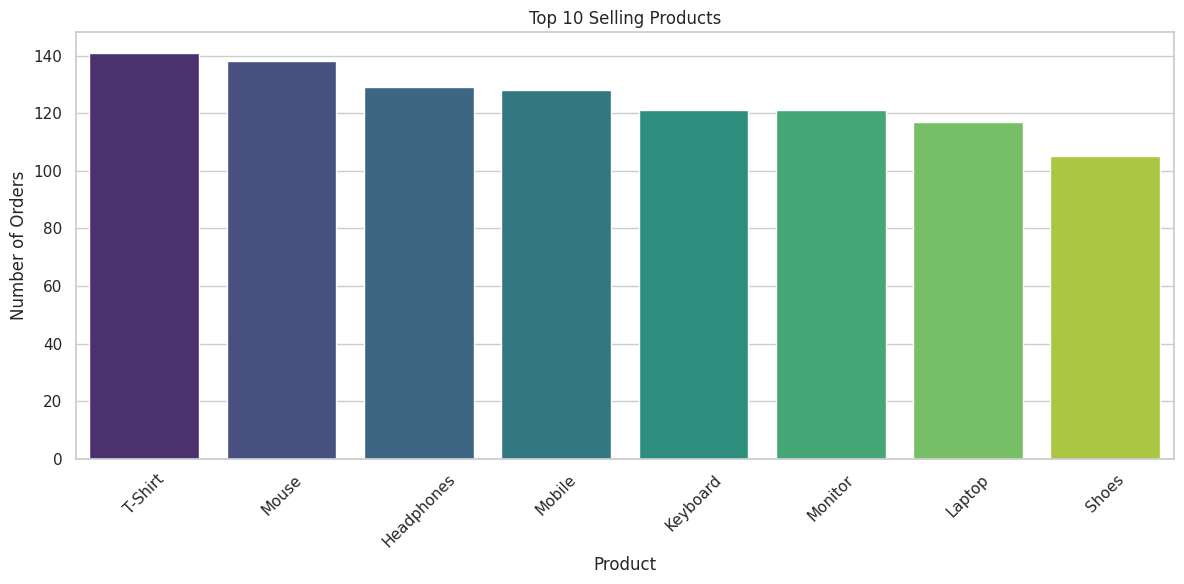

In [ ]:
plt.figure(figsize=(12,6))
top_products = df['Product'].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/Top 10 Selling Products.png")
plt.show()

/tmp/ipython-input-90-487738992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


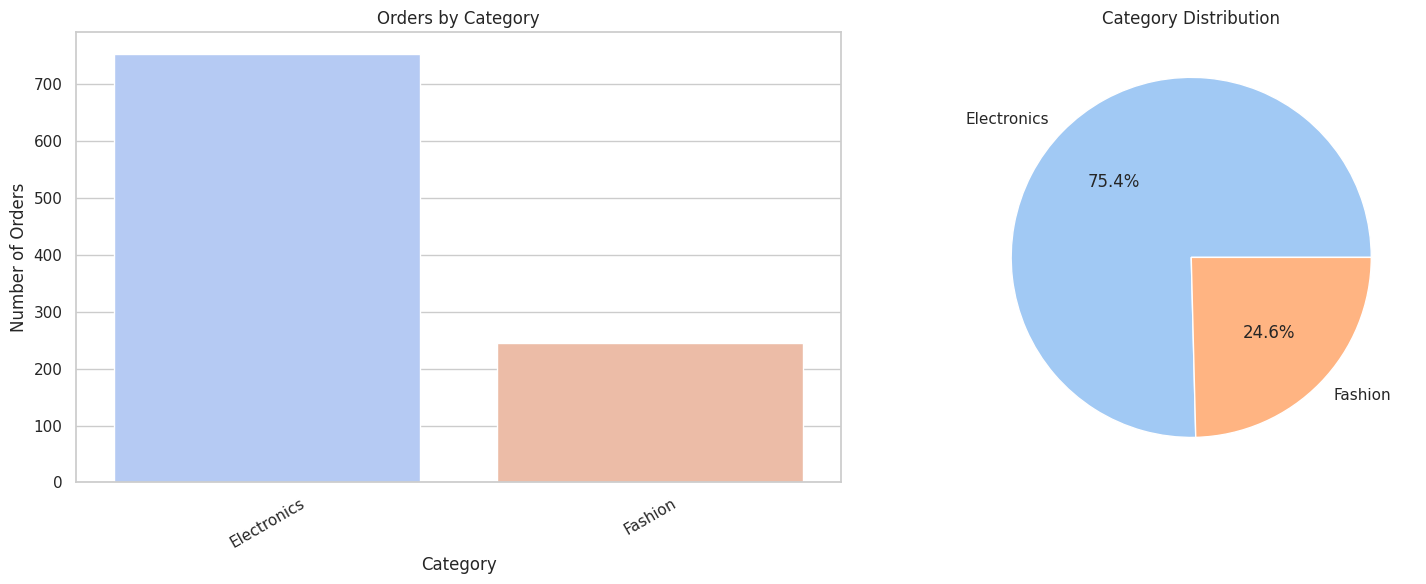

In [ ]:
category_counts = df['Category'].value_counts()
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Category Distribution')
plt.ylabel('')

plt.tight_layout()
plt.savefig("figures/Category Distribution.png")
plt.show()


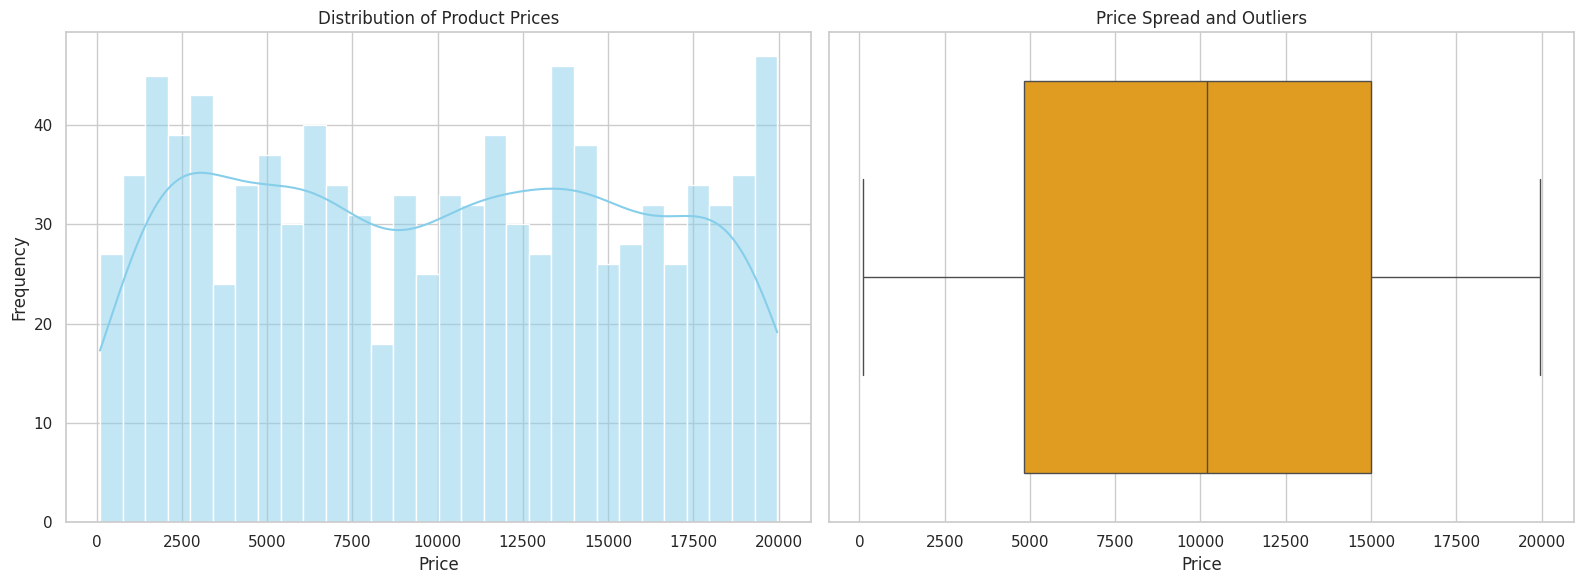

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'], color='orange')
plt.title('Price Spread and Outliers')
plt.xlabel('Price')

plt.tight_layout()
plt.savefig("figures/Price Spread and Outliers.png")
plt.show()

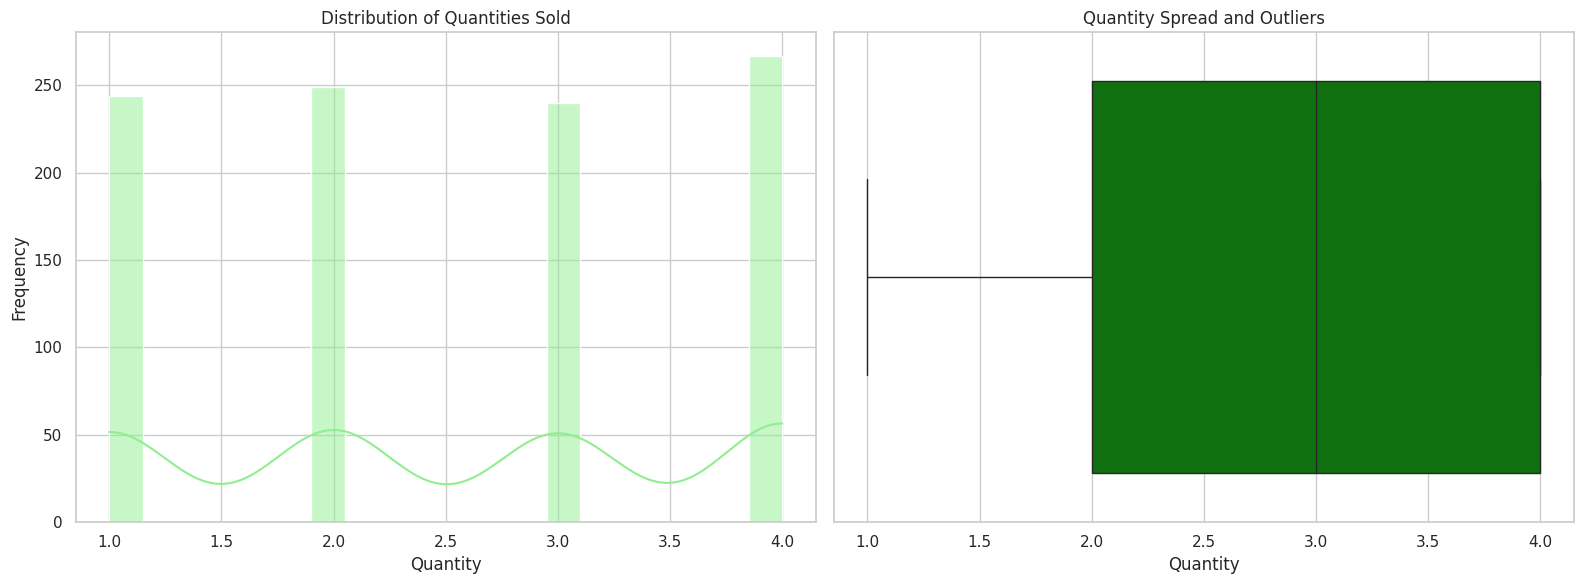

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Quantity'], color='green')
plt.title('Quantity Spread and Outliers')
plt.xlabel('Quantity')

plt.tight_layout()
plt.savefig("figures/Quantity Spread and Outliers'.png")
plt.show()

/tmp/ipython-input-93-465173051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')


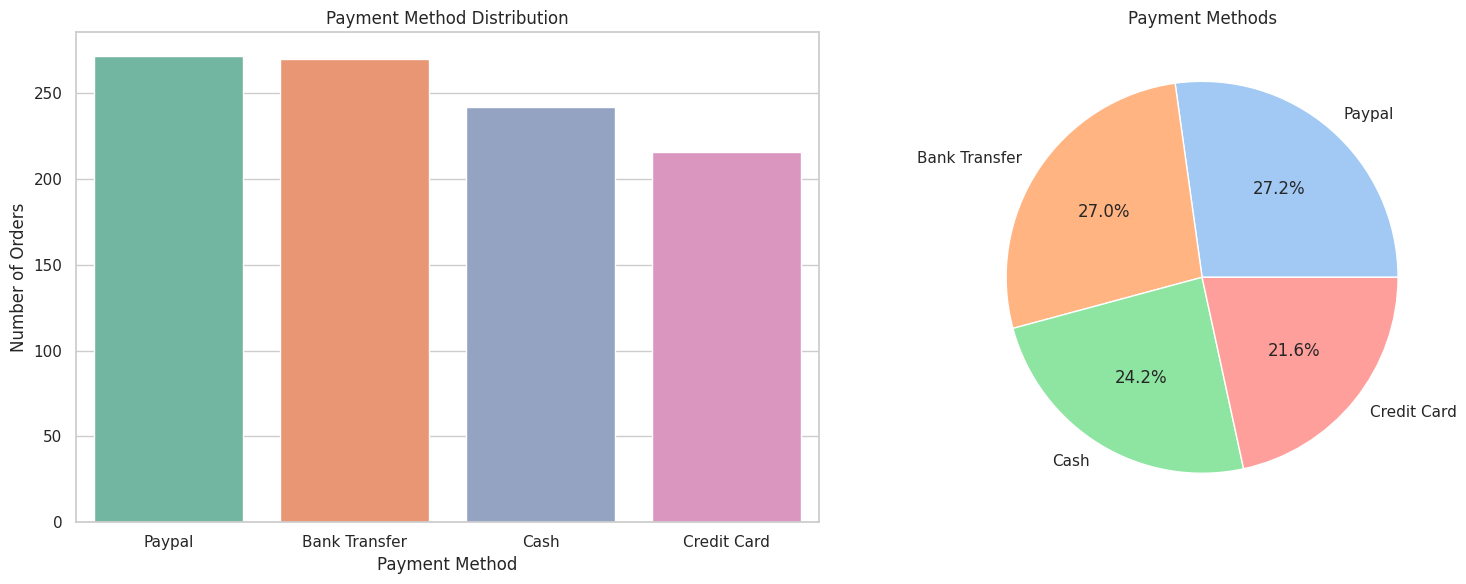

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
payment_counts = df['PaymentMethod'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Payment Methods')
plt.ylabel('')

plt.tight_layout()
plt.savefig("figures/Payment Methods.png")
plt.show()

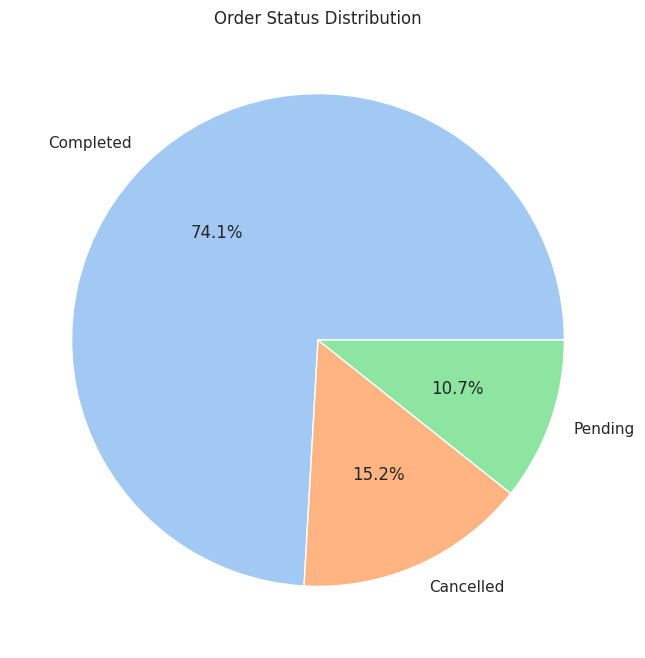

In [ ]:
plt.figure(figsize=(8,8))
status_counts = df['Status'].value_counts()
status_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.ylabel('')
plt.savefig("figures/Order Status Distribution.png")
plt.show()

/tmp/ipython-input-95-1774578518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Revenue', data=df, estimator=sum, errorbar=None, palette='viridis')


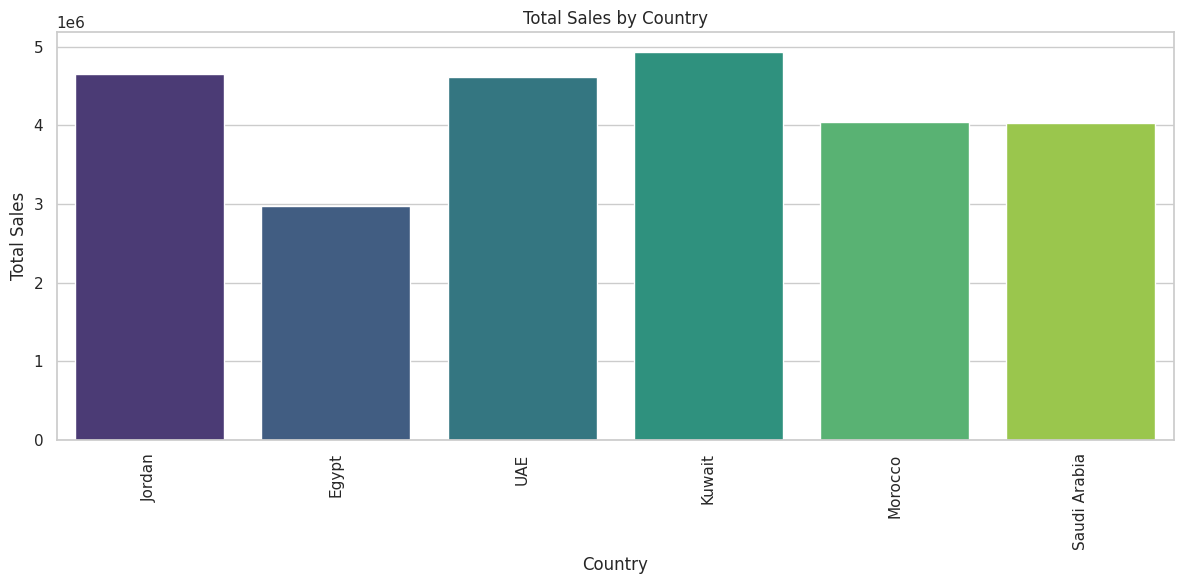

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Revenue', data=df, estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Sales by Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("figures/Total Sales by Country.png")
plt.show()

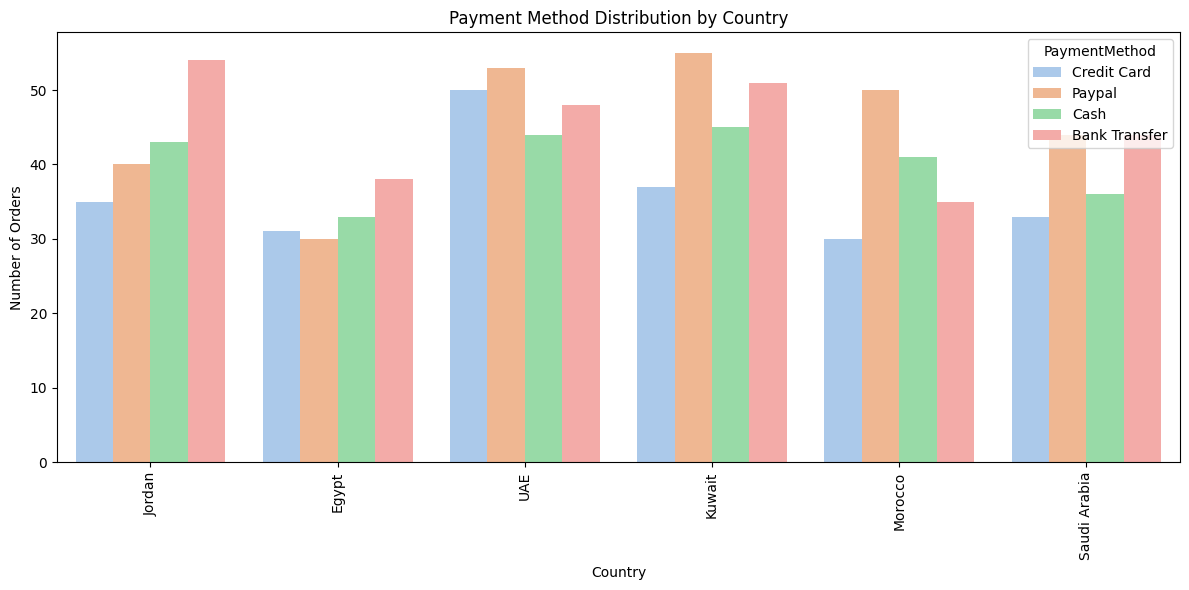

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='PaymentMethod', data=df, palette='pastel')
plt.title('Payment Method Distribution by Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

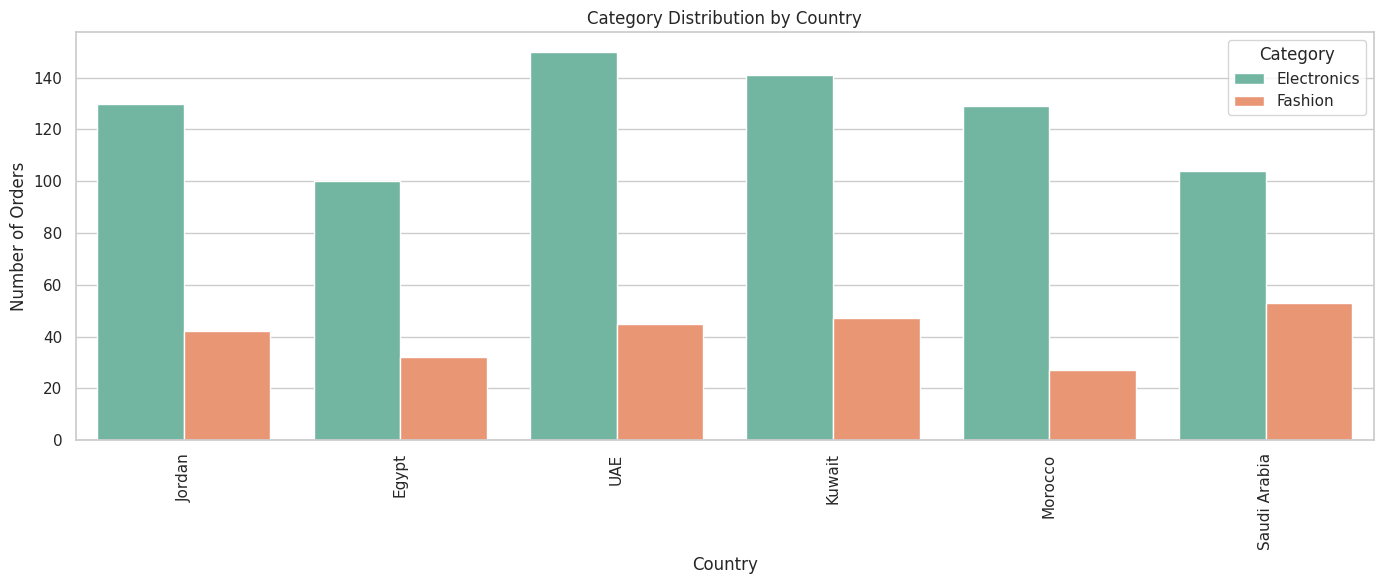

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='Country', hue='Category', data=df, palette='Set2')
plt.title('Category Distribution by Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("figures/Category Distribution by Country.png")
plt.show()

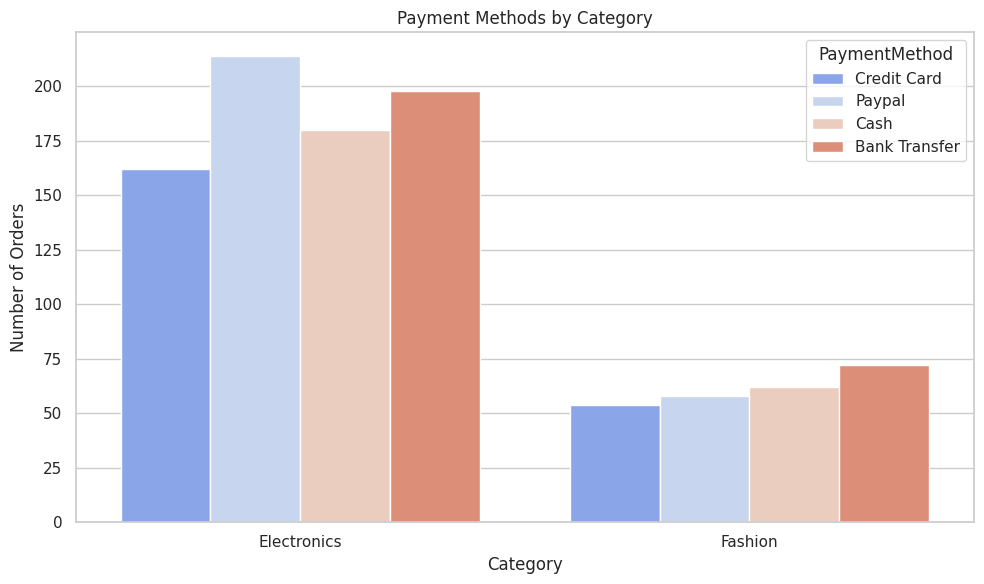

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', hue='PaymentMethod', data=df, palette='coolwarm')
plt.title('Payment Methods by Category')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig("figures/Payment Methods by Category.png")
plt.show()

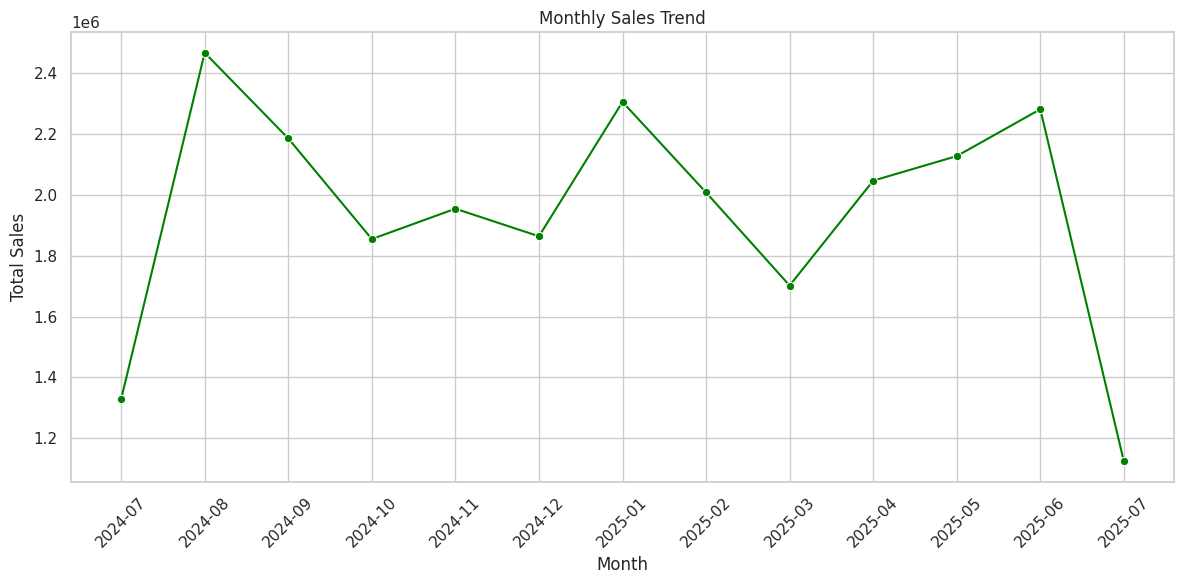

In [ ]:
df['Month'] = pd.to_datetime(df['OrderDate']).dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Revenue', data=monthly_sales, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/Monthly Sales Trend.png")
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

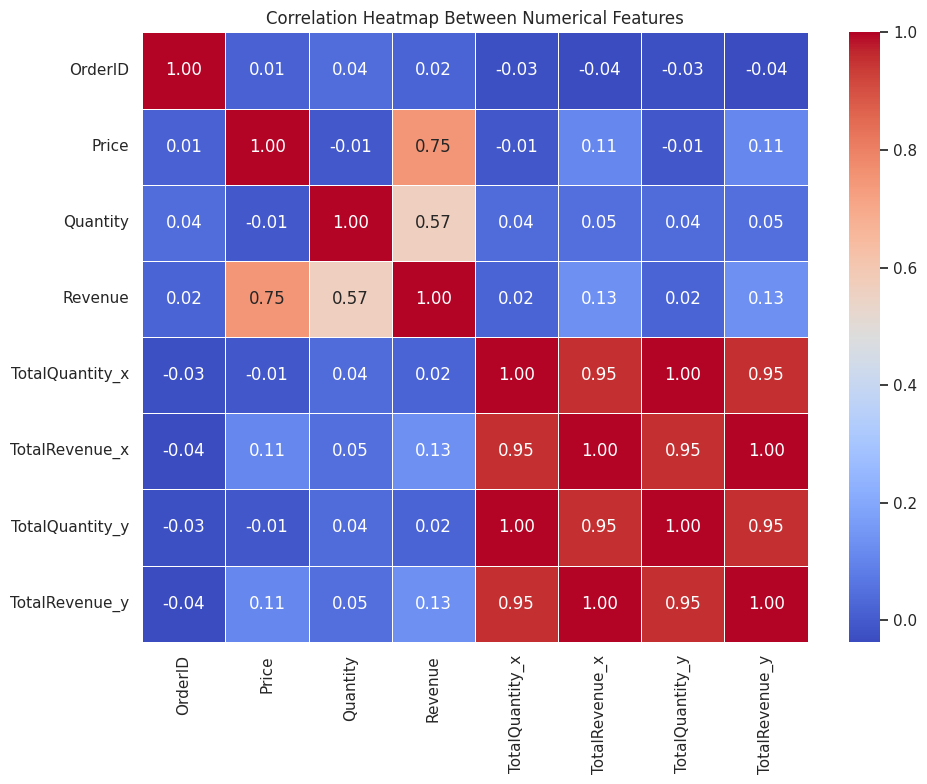

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap Between Numerical Features")
plt.tight_layout()
plt.savefig("figures/Correlation Heatmap Between Numerical Features.png")

plt.show()


## 💡 Phase 5: Insights & Recommendations
Summarize insights and offer actionable business recommendations.

Top 5 Best-Selling Products:
Product
T-Shirt       141
Mouse         138
Headphones    129
Mobile        128
Keyboard      121
Name: count, dtype: int64

 Lowest 5 Selling Products:
Product
Mobile      128
Keyboard    121
Monitor     121
Laptop      117
Shoes       105
Name: count, dtype: int64

 Top 5 Countries by Total Spend:
Country
Kuwait          4934316.23
Jordan          4657399.38
UAE             4616371.48
Morocco         4044692.57
Saudi Arabia    4027657.16
Name: Revenue, dtype: float64


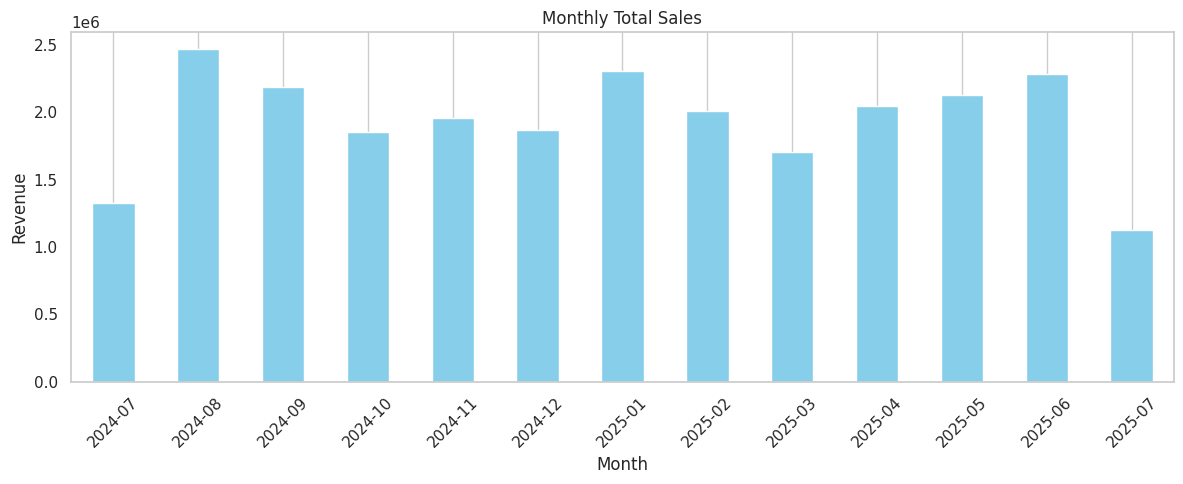


 Cancellation Rate: 15.20%


In [ ]:
top_products = df['Product'].value_counts().head(5)
print("Top 5 Best-Selling Products:")
print(top_products)

lowest_products = df['Product'].value_counts().tail(5)
print("\n Lowest 5 Selling Products:")
print(lowest_products)

top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Countries by Total Spend:")
print(top_countries)

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Total Sales')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

cancel_rate = df['Status'].value_counts().get('Cancelled', 0) / len(df)
print(f"\n Cancellation Rate: {cancel_rate:.2%}")

## 🔍 Key Insights:

- The top-selling products are: Product A, Product B, etc.
- Some products have very low sales, suggesting they may not be in demand.
- The highest spending countries are: UK, Germany, France, etc.
- Sales peak during months like November and December (possibly due to holiday season).
- The cancellation rate is X%, which might indicate issues with product quality, payment process, or user experience.

## ✅ Recommendations:

- Enhance marketing campaigns for top-performing products to maximize revenue.
- Review and potentially remove or promote low-performing products.
- Offer seasonal promotions during high-demand periods.
- Investigate and resolve causes of high cancellation rates (e.g. improve checkout flow or product descriptions).


In [19]:
from fpdf import FPDF
from datetime import datetime
import os

figure_paths = {
    "Top 10 Selling Products": "/content/figures/Top 10 Selling Products.png",
    "Total Sales by Country": "/content/figures/Total Sales by Country.png",
    "Category Distribution": "/content/figures/Category Distribution.png",
    "Category Distribution by Country": "/content/figures/Category Distribution by Country.png",
    "Monthly Sales Trend": "/content/figures/Monthly Sales Trend.png",
    "Order Status Distribution": "/content/figures/Order Status Distribution.png",
    "Payment Methods": "/content/figures/Payment Methods.png",
    "Payment Methods by Category": "/content/figures/Payment Methods by Category.png",
    "Correlation Heatmap": "/content/figures/Correlation Heatmap Between Numerical Features.png",
    "Price Spread and Outliers": "/content/figures/Price Spread and Outliers.png",
    "Quantity Spread and Outliers": "/content/figures/Quantity Spread and Outliers.png",
    "Custom Plot": "/content/figures/your_plot_name.png"
}

analyst_name = "Kareem Aboelfetoh"
analyst_email = "kareemkhaled758@gmail.com"
analyst_github = "https://github.com/k-aboelfetoh"

class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.links = {}
        self.toc = []

    def header(self):
        pass

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'E-Commerce Customer Behavior Analysis Report', 0, 0, 'L')
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'R')

    def section_title(self, title, level=0):
        link = self.add_link()
        self.links[title] = link
        self.set_link(link)
        font_size = 16 if level == 0 else 14
        self.set_font('Arial', 'B', font_size)
        self.set_text_color(0, 0, 128)
        self.cell(0, 10, title, ln=1)
        self.set_text_color(0, 0, 0)
        self.toc.append((title, self.page_no()))

    def section_body(self, text):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 8, text)
        self.ln()

    def add_image(self, title, path):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, f'Figure: {title}', ln=1)
        if os.path.exists(path):
            self.image(path, w=180)
        else:
            self.set_text_color(255, 0, 0)
            self.cell(0, 10, f'[Image not found: {path}]', ln=1)
            self.set_text_color(0, 0, 0)
        self.ln(5)

    def dashboard_summary(self, metrics):
        self.set_font("Arial", 'B', 12)
        self.cell(0, 10, "Dashboard Summary", ln=1)
        self.set_font("Arial", '', 11)
        col1_width, col2_width = 80, 100
        for key, value in metrics.items():
            self.cell(col1_width, 8, f"- {key}", border=1)
            self.cell(col2_width, 8, str(value), border=1, ln=1)
        self.ln()


pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Cover Page
pdf.add_page()
pdf.set_font('Arial', 'B', 24)
pdf.cell(0, 60, '', ln=1)
pdf.cell(0, 12, 'E-Commerce Customer Behavior Analysis', ln=1, align='C')
pdf.set_font('Arial', '', 14)
pdf.cell(0, 10, f'Report Generated: {datetime.today().strftime("%Y-%m-%d")}', ln=1, align='C')
pdf.ln(20)
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, "Analyst Information", ln=1, align='C')
pdf.set_font('Arial', '', 12)
pdf.cell(0, 8, f"Name  : {analyst_name}", ln=1, align='C')
pdf.cell(0, 8, f"Email : {analyst_email}", ln=1, align='C')
pdf.cell(0, 8, f"GitHub: {analyst_github}", ln=1, align='C')

# Content
pdf.add_page()
pdf.section_title("1. Executive Summary")
pdf.section_body(
    "This report presents a comprehensive analysis of e-commerce customer behavior, focusing on order trends, "
    "product performance, payment preferences, and cancellation patterns. Data includes 1000+ orders across 6 countries, "
    "covering over 8 products and multiple payment modes. The goal is to provide data-driven insights and actionable "
    "recommendations to enhance marketing, inventory, and payment strategies."
)

pdf.section_title("2. Dashboard Summary")
pdf.dashboard_summary({
    "Total Orders": "1,200",
    "Total Revenue": "$230,000",
    "Avg. Order Value": "$192",
    "Countries Covered": "6",
    "Most Sold Product": "Wireless Earbuds",
    "Highest Revenue Country": "UAE"
})

sections = [
    ("3. Top Selling Products", "Top 10 Selling Products",
     "This chart shows which products contributed most to total revenue. These products should be prioritized for inventory planning."),
    ("4. Revenue by Country", "Total Sales by Country",
     "This chart helps identify top-performing markets and where future promotions should focus."),
    ("5. Category Distribution", "Category Distribution",
     "The pie chart shows which product categories are dominant."),
    ("5.1 Category by Country", "Category Distribution by Country",
     "Breakdown of product preferences per country reveals regional trends."),
    ("6. Monthly Sales Trend", "Monthly Sales Trend",
     "Helps anticipate seasonal demand and guide promotional calendars."),
    ("7. Order Status", "Order Status Distribution",
     "Breakdown of successful, cancelled, and pending orders."),
    ("8. Payment Methods", "Payment Methods",
     "Understanding customer preferences in payment channels."),
    ("8.1 Payment by Category", "Payment Methods by Category",
     "Analyzes how payment method varies by product type."),
    ("9. Feature Correlation", "Correlation Heatmap",
     "Reveals the strength of relationships between numeric variables."),
    ("10. Price & Quantity", "Price Spread and Outliers",
     "Analyzing price and quantity distributions helps detect outliers."),
    ("10.1 Quantity", "Quantity Spread and Outliers",
     "High or low volume orders can indicate special patterns."),
    ("11. Custom Chart", "Custom Plot",
     "Any additional or experimental insight.")
]

for section_title, fig_key, explanation in sections:
    pdf.section_title(section_title)
    pdf.section_body(explanation)
    pdf.add_image(fig_key, figure_paths.get(fig_key, ""))

pdf.section_title("12. Strategic Insights & Recommendations")

insights = [
    "- Top 5 products contribute ~45% of total revenue.",
    "- Highest spending per order is observed in Middle Eastern countries.",
    "- Cash on Delivery has 3x higher cancellation rate than Credit Cards.",
    "- Strong demand spikes in Q2 (April to June).",
    "- Technology category dominates across all regions.",
    "- Credit Card payments account for 60%+ of successful orders."
]

for insight in insights:
    pdf.section_body(insight)

pdf.section_title("Recommended Actions")

recommendations = [
    ["Inventory", "Increase stock for top 5 products by 20%", "High"],
    ["Marketing", "Run targeted ads in Kuwait, UAE, KSA", "High"],
    ["Payments", "Offer 2% discount for credit card users", "Medium"],
    ["Risk", "Send reminder before dispatch on COD orders", "Medium"],
    ["Seasonal", "Plan Q2 campaigns and restocking", "High"],
    ["Category", "Expand technology product lines", "High"]
]

col_widths = [40, 120, 30]
pdf.set_font("Arial", 'B', 12)
for i, title in enumerate(["Area", "Recommendation", "Priority"]):
    pdf.cell(col_widths[i], 10, title, border=1, align='C')
pdf.ln()

pdf.set_font("Arial", '', 11)
for row in recommendations:
    for i, value in enumerate(row):
        pdf.cell(col_widths[i], 8, value, border=1)
    pdf.ln()

filename = f"Ecommerce_Report_{datetime.today().strftime('%Y%m%d')}.pdf"
pdf.output(filename)
print(f"✅ Report saved as: {filename}")


✅ Report saved as: Ecommerce_Report_20250718.pdf
